## Importing the Libraries and packages

In [1]:
import warnings as w
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
w.filterwarnings('ignore')


## Reading the datset

In [2]:
df = pd.read_csv(r"Z:\226511 ML\Data Sets\MLK\IOT-temp.csv")

## Dropping the id and room_id/id columns.

In [3]:
df.drop(["id", "room_id/id"], axis=1, inplace=True)


In [4]:
df

,noted_date,temp,out/in
0,08-12-2018 09:30,29,In
1,08-12-2018 09:30,29,In
2,08-12-2018 09:29,41,Out
3,08-12-2018 09:29,41,Out
4,08-12-2018 09:29,31,In
...,...,...,...
97601,28-07-2018 07:07,31,In
97602,28-07-2018 07:07,31,In
97603,28-07-2018 07:06,31,In
97604,28-07-2018 07:06,31,In


## Printing the statistics of the dataset.

In [5]:
df.describe()

,temp
count,97606.000000
mean,35.053931
std,5.699825
min,21.000000
25%,30.000000
50%,35.000000
75%,40.000000
max,51.000000


## Printing the structure of data.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   noted_date  97606 non-null  object
 1   temp        97606 non-null  int64 
 2   out/in      97606 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.2+ MB


## Checking the null values in the dataset.

In [7]:
df.isna().sum()

noted_date    0
temp          0
out/in        0
dtype: int64

In [8]:
df

,noted_date,temp,out/in
0,08-12-2018 09:30,29,In
1,08-12-2018 09:30,29,In
2,08-12-2018 09:29,41,Out
3,08-12-2018 09:29,41,Out
4,08-12-2018 09:29,31,In
...,...,...,...
97601,28-07-2018 07:07,31,In
97602,28-07-2018 07:07,31,In
97603,28-07-2018 07:06,31,In
97604,28-07-2018 07:06,31,In


## Converting the timestamp column from object to datatime for feature engineering.

In [9]:
df["noted_date"] = pd.to_datetime(df.noted_date)


In [10]:
df["date"] = df["noted_date"].dt.date
df["time"] = df["noted_date"].dt.time


In [11]:
df.drop("noted_date", axis=1, inplace=True)


In [12]:
df

,temp,out/in,date,time
0,29,In,2018-08-12,09:30:00
1,29,In,2018-08-12,09:30:00
2,41,Out,2018-08-12,09:29:00
3,41,Out,2018-08-12,09:29:00
4,31,In,2018-08-12,09:29:00
...,...,...,...,...
97601,31,In,2018-07-28,07:07:00
97602,31,In,2018-07-28,07:07:00
97603,31,In,2018-07-28,07:06:00
97604,31,In,2018-07-28,07:06:00


## Encoding the labels into 0(In) and 1(Out).

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


In [14]:
df["out/in"] = le.fit_transform(df["out/in"])


In [15]:
df = df.rename(columns={"out/in": "in/out"})


In [16]:
df

,temp,in/out,date,time
0,29,0,2018-08-12,09:30:00
1,29,0,2018-08-12,09:30:00
2,41,1,2018-08-12,09:29:00
3,41,1,2018-08-12,09:29:00
4,31,0,2018-08-12,09:29:00
...,...,...,...,...
97601,31,0,2018-07-28,07:07:00
97602,31,0,2018-07-28,07:07:00
97603,31,0,2018-07-28,07:06:00
97604,31,0,2018-07-28,07:06:00


## Extracting the Year, Month, Day from date column.

In [17]:
df.date = pd.to_datetime(df.date)

In [18]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day


In [19]:
df

,temp,in/out,date,time,year,month,day
0,29,0,2018-08-12,09:30:00,2018,8,12
1,29,0,2018-08-12,09:30:00,2018,8,12
2,41,1,2018-08-12,09:29:00,2018,8,12
3,41,1,2018-08-12,09:29:00,2018,8,12
4,31,0,2018-08-12,09:29:00,2018,8,12
...,...,...,...,...,...,...,...
97601,31,0,2018-07-28,07:07:00,2018,7,28
97602,31,0,2018-07-28,07:07:00,2018,7,28
97603,31,0,2018-07-28,07:06:00,2018,7,28
97604,31,0,2018-07-28,07:06:00,2018,7,28


## Plotting the box/whisker plot for temperature's data.

<AxesSubplot:xlabel='temp'>

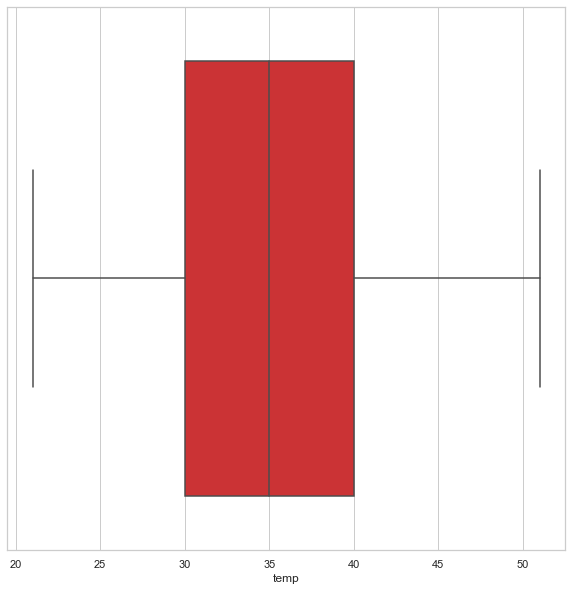

In [20]:
plt.figure(figsize=(10, 10))
sns.set_theme(style="whitegrid")
sns.boxplot("temp", data=df, palette="Set1")


## Data distribution of Temp of IOT devices is good.

In [25]:
a = df[["temp", "in/out"]].groupby("in/out").count()


In [27]:
a.reset_index(inplace=True)

## Plotting the barplot for temp vs in/out.

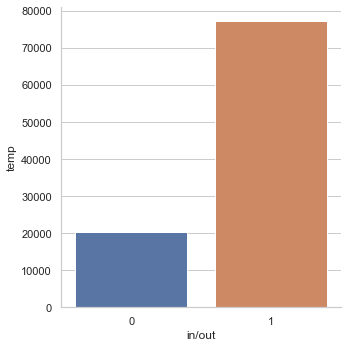

In [28]:
sns.catplot(x="in/out", y="temp", data=a, kind="bar")


## So after plotting the bar plot for in/out vs temperature we got to know that out temparatures of IOT devices are ranging in hotter range of temp and in temp are in low temp range.